# Word Embeddings

* A word embedding is a learned representation for text where words that have the same meaning have a similar representation. * 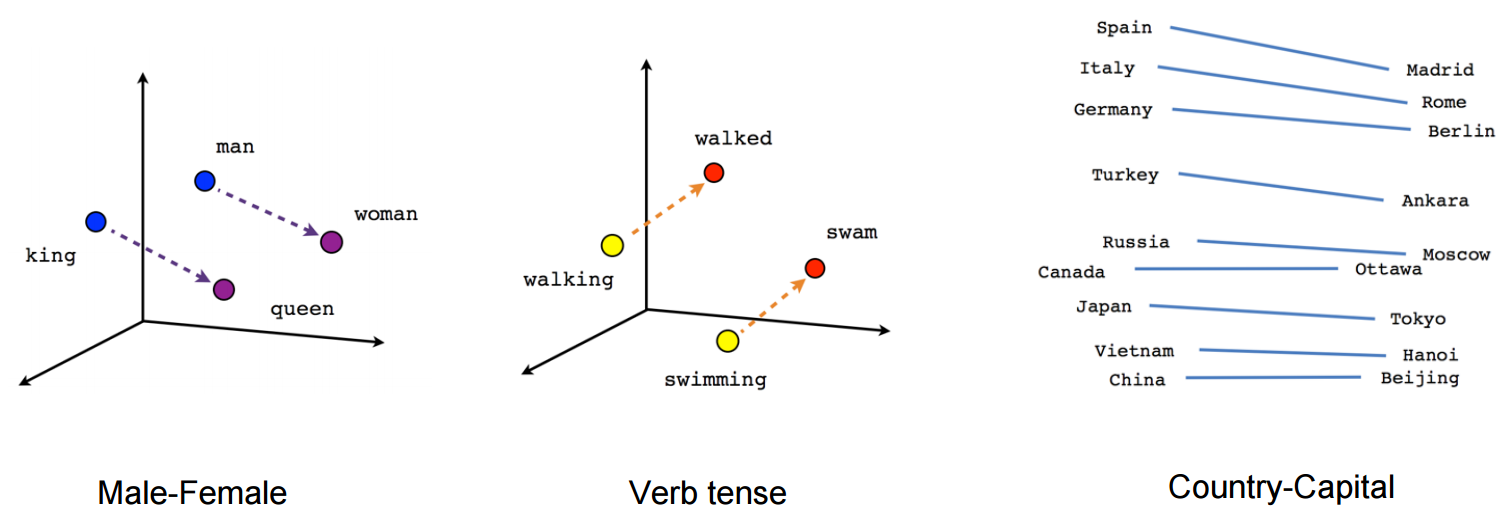
* n-grams is not able to capture the contextual similarity of the word and preserve long term word dependecy.
* As the number of vocabulary increases count vectorizers and tf-idf matrix size also increases linearly which becomes inefficient for computation.

Here I have explored w2v using gensim library.Data expected by w2v is token of sent 2-D array .Training our data on w2v can be done by directly by initializing and passing req parameter to w2v like

* num_features = 300    # Word vector dimensionality                      
* min_word_count = 40   # Minimum word count to consider when training the model                        
* num_workers = 4       # Number of threads to run in parallel
* context = 10          # Context window size                                                                                    
*  downsampling = 1e-3   # Downsample setting for frequent words

Once you learn word embedding for your text data, I used classical projection methods to reduce the high-dimensional word vectors to two-dimensional plots and plot them on a graph.

Also it comes up with existinf pre trained model traned on huge dataset.



* https://machinelearningmastery.com/crash-course-deep-learning-natural-language-processing/
* https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
*  https://www.analyticsvidhya.com/blog/2017/07/word-representations-text-classification-using-fasttext-nlp-facebook/

In [3]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline

# To train data on w2v , it need tokens of sentences

In [4]:
# define training data
#imp sentences are token of word 2-D array
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

# Load word2vec

In [6]:
'''
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words
'''
# train model
model = Word2Vec(sentences, min_count=1)
# Set values for various parameters


# Dimentionality reduction using PCA

In [7]:
# fit a 2D PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result_pca = pca.fit_transform(X)

C:\Users\DBCE\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


# Plotting

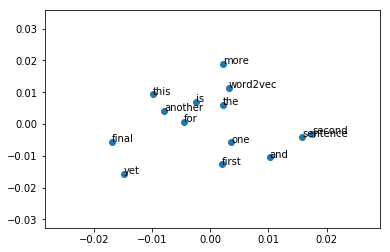

In [8]:
# create a scatter plot of the projection
pyplot.scatter(result_pca[:, 0], result_pca[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result_pca[i, 0], result_pca[i, 1]))
pyplot.show()

* pca plot*********************************************** 

In [9]:
# summarize vocabulary
words = list(model.wv.vocab)

In [10]:
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


# # Dimentionality reduction using t -SNE

In [11]:
from sklearn.manifold import TSNE
# fits it dowm to x,y from high diimension
tSNE = TSNE(n_components=2)
result_tSNE = tSNE.fit_transform(X)

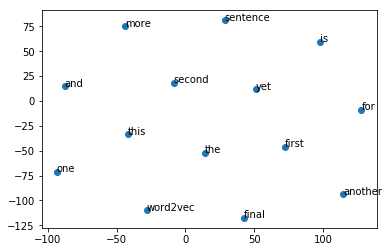

In [12]:
# create a scatter plot of the projection
pyplot.scatter(result_tSNE[:, 0], result_tSNE[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result_tSNE[i, 0], result_tSNE[i, 1]))
pyplot.show()

In [13]:
print(result_tSNE.most_similar('second'))


AttributeError: 'numpy.ndarray' object has no attribute 'most_similar'